In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import tkinter as tk
from tkinter import ttk, messagebox

C:\Users\User\AppData\Local\Temp\ipykernel_12576\4188961119.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


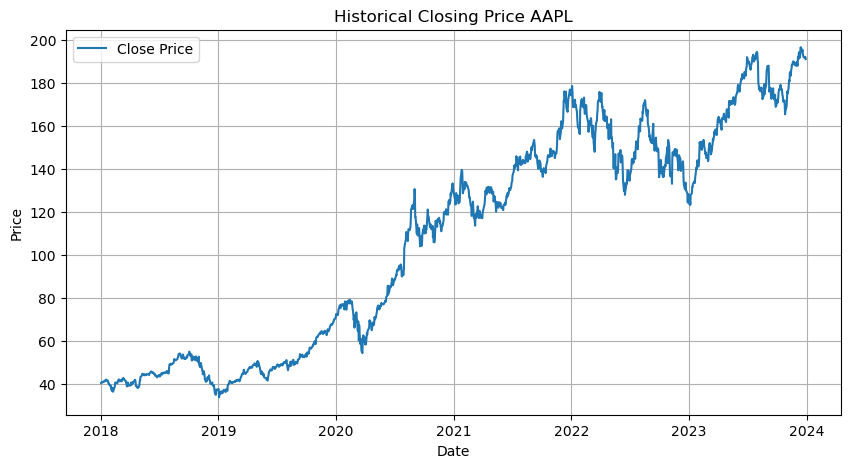

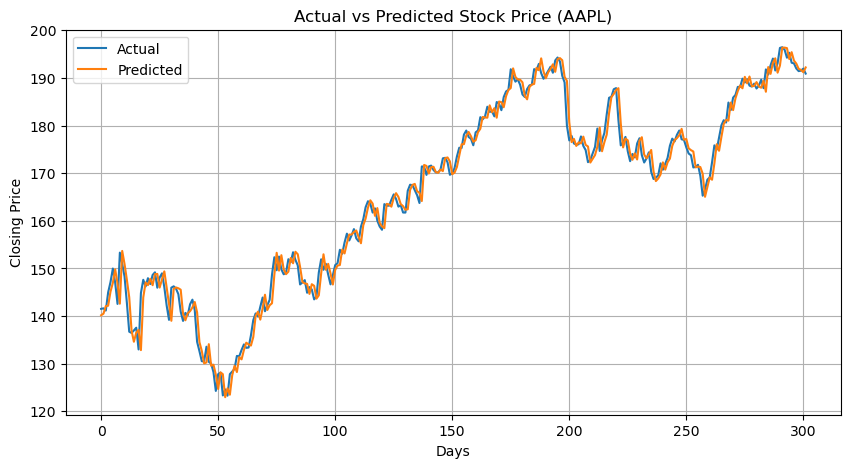

In [21]:

def train_model(ticker="AAPL", start="2018-01-01", end="2023-12-31"):
    data = yf.download(ticker, start=start, end=end)
    data = data.dropna()

    plt.figure(figsize=(10, 5))
    plt.plot(data['Close'], label='Close Price')
    plt.title(f'Historical Closing Price {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


    data['Target'] = data['Close'].shift(-1)
    data = data[:-1]
    
    X = data[['Open', 'High', 'Low', 'Close']]
    y = data['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)


    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Price ({ticker})')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

model = train_model("AAPL")

In [22]:
def predict_stock():
    try:
        global model
        ticker = combo_company.get()
        model = train_model(ticker)
        
        open_price = float(entry_open.get())
        high_price = float(entry_high.get())
        low_price = float(entry_low.get())
        close_price = float(entry_close.get())

        features = np.array([[open_price, high_price, low_price, close_price]])
        prediction = model.predict(features)

        lbl_result.config(text=f"{ticker} → Predicted Next Day Close: {prediction[0]:.2f} USD")
    except Exception as e:
        messagebox.showerror("Error", str(e))

C:\Users\User\AppData\Local\Temp\ipykernel_12576\4188961119.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


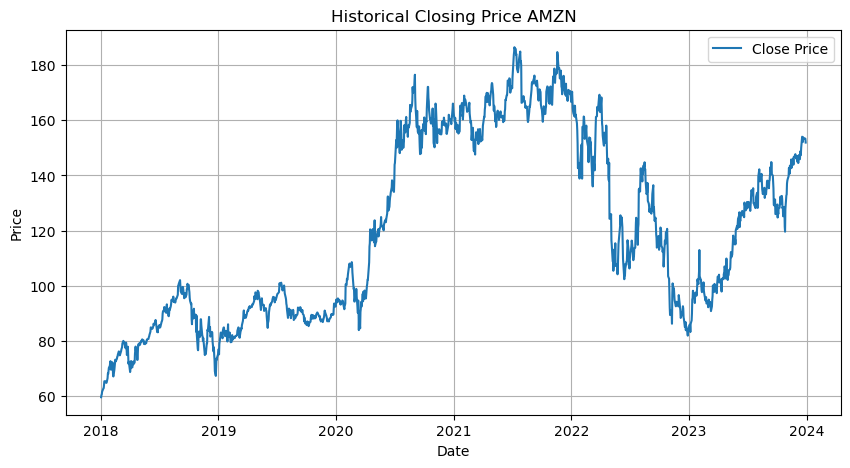

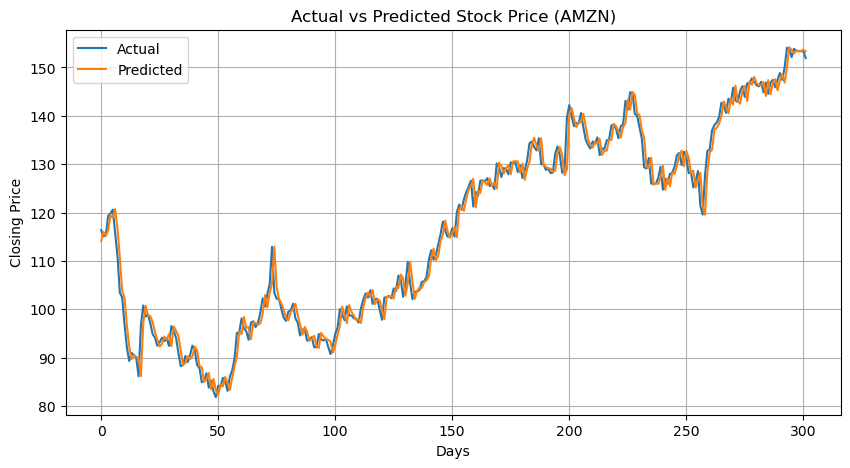

In [23]:
root = tk.Tk()
root.title("Stock Price Prediction")
root.geometry("420x400")

tk.Label(root, text="Select Company:").grid(row=0, column=0, padx=10, pady=10, sticky="w")
companies = ["AAPL", "MSFT", "TSLA", "AMZN", "GOOGL", "META", "NFLX"]
combo_company = ttk.Combobox(root, values=companies, state="readonly")
combo_company.grid(row=0, column=1, padx=10, pady=10)
combo_company.set("AAPL")

tk.Label(root, text="Open Price:").grid(row=1, column=0, padx=10, pady=5, sticky="w")
entry_open = tk.Entry(root); entry_open.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="High Price:").grid(row=2, column=0, padx=10, pady=5, sticky="w")
entry_high = tk.Entry(root); entry_high.grid(row=2, column=1, padx=10, pady=5)

tk.Label(root, text="Low Price:").grid(row=3, column=0, padx=10, pady=5, sticky="w")
entry_low = tk.Entry(root); entry_low.grid(row=3, column=1, padx=10, pady=5)

tk.Label(root, text="Close Price:").grid(row=4, column=0, padx=10, pady=5, sticky="w")
entry_close = tk.Entry(root); entry_close.grid(row=4, column=1, padx=10, pady=5)

btn_predict = tk.Button(root, text="Predict", command=predict_stock, bg="lightblue", font=("Arial", 10, "bold"))
btn_predict.grid(row=5, column=0, columnspan=2, pady=15)

lbl_result = tk.Label(root, text="", font=("Arial", 12, "bold"), fg="green")
lbl_result.grid(row=6, column=0, columnspan=2, pady=10)

root.mainloop()